## This notebook shows how to use Orchestrator APIs for user experiments

In [1]:
import os
from fabric_cm.credmgr.credmgr_proxy import CredmgrProxy
from fabric_cf.orchestrator.orchestrator_proxy import OrchestratorProxy
import json

In [2]:
credmgr_host = os.environ['FABRIC_CREDMGR_HOST']
credmgr_proxy = CredmgrProxy(credmgr_host=credmgr_host)
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']
orchestrator_proxy = OrchestratorProxy(orchestrator_host=orchestrator_host)

### Fabric Tokens
Fabric has 2 kinds of tokens:<br>
- Identity : required for Control/Measurement Framework APIs. Identity Token is valid upto an hour.
- Refresh : required to generate new Identity Tokens valid. Refresh Token is valid for 24 hours.

Fabric Identity token is required for Control/Measurement Framework APIs.<br>

When user logins to Jupyterhub after authenticating against CILogon, OIDC refresh token is derived. <br>
This token is available as the environment variable `CILOGON_REFRESH_TOKEN`.<br>

On the first login, we use `CILOGON_REFRESH_TOKEN` to generate new Fabric Identity Token and Fabric Refresh Token.<br>
For any subsequent use, we use Fabric Refresh Token. On every refresh, Fabric Refresh Token is changed and updated.<br>

NOTE: These steps are required for any experiments on Fabric Testbed.<br>

In [4]:
not_found=False
fabric_refresh_token=None
%store -r fabric_refresh_token

if fabric_refresh_token is None:
    fabric_refresh_token=os.environ['CILOGON_REFRESH_TOKEN']
    %store fabric_refresh_token
print("Fabric Refresh Token {}".format(fabric_refresh_token))
print("CILOGON_REFRESH_TOKEN environment variable: {}".format(os.environ['CILOGON_REFRESH_TOKEN']))

Fabric Refresh Token NB2HI4DTHIXS6Y3JNRXWO33OFZXXEZZPN5QXK5DIGIXTGN3FGM2WMNZSGVSDEY3GGQ2DSNBSMU2GIMRUMJTGMZJXGQ3TCYJ7OR4XAZJ5OJSWM4TFONUFI33LMVXCM5DTHUYTMMJYGY3DEMZUHA2DSNBGOZSXE43JN5XD25RSFYYCM3DJMZSXI2LNMU6TQNRUGAYDAMBQ
CILOGON_REFRESH_TOKEN environment variable: NB2HI4DTHIXS6Y3JNRXWO33OFZXXEZZPN5QXK5DIGIXTEZBVGMZDQODCGBRTANDEGA3GIMLBMI4DEYTBMY3TKYTBGE4WMNJ7OR4XAZJ5OJSWM4TFONUFI33LMVXCM5DTHUYTMMJYGY3DEMJYGA3DCMBGOZSXE43JN5XD25RSFYYCM3DJMZSXI2LNMU6TQNRUGAYDAMBQ


### Get new Fabric Identity Token and update Fabric Refresh Token

Users can request tokens with different Project and Scopes by altering `project_name` and `scope` parameters in the refresh call below.

In [5]:
try:
    refresh_res = credmgr_proxy.refresh(project_name='all', scope='all', refresh_token=fabric_refresh_token)
    print("New Tokens received: {}".format(json.dumps(refresh_res)))
    fabric_id_token=refresh_res['id_token']
    fabric_refresh_token=refresh_res['refresh_token']
    print()
    print("New Refresh Token: {}".format(fabric_refresh_token))
    print()
    print("Stored new Refresh Token")
    %store fabric_refresh_token
except Exception as e:
    print("Exception occurred while getting tokens:{}".format(e))

New Tokens received: {"id_token": "eyJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiIsImtpZCI6ImI0MTUxNjcyMTExOTFlMmUwNWIyMmI1NGIxZDNiNzY2N2U3NjRhNzQ3NzIyMTg1ZTcyMmU1MmUxNDZmZTQzYWEifQ.eyJlbWFpbCI6Im1pbmF3bUBidS5lZHUiLCJjZXJ0X3N1YmplY3RfZG4iOiIvREM9b3JnL0RDPWNpbG9nb24vQz1VUy9PPUJvc3RvbiBVbml2ZXJzaXR5L0NOPU1pbmEgV2lsbGlhbSBNb3Jjb3MgQjQxMzUwNzg3IiwiaWRwIjoiaHR0cHM6Ly9zaGliLmJ1LmVkdS9pZHAvc2hpYmJvbGV0aCIsImlkcF9uYW1lIjoiQm9zdG9uIFVuaXZlcnNpdHkiLCJlcHBuIjoibWluYXdtQGJ1LmVkdSIsImVwdGlkIjoiaHR0cHM6Ly9zaGliLmJ1LmVkdS9pZHAvc2hpYmJvbGV0aCFodHRwczovL2NpbG9nb24ub3JnL3NoaWJib2xldGghUmZSTTBqUWdkYWJHbWFNZmRkRUVZZVlHRTJzPSIsImFmZmlsaWF0aW9uIjoic3R1ZGVudEBidS5lZHU7bWVtYmVyQGJ1LmVkdSIsIm5hbWUiOiJNaW5hIFdpbGxpYW0gTW9yY29zIiwiYWNyIjoiaHR0cHM6Ly9zaGliLmJ1LmVkdS9zaW5nbGUiLCJlbnRpdGxlbWVudCI6Imh0dHA6Ly9pYW0uYnUuZWR1L2lkaW5mby84MDtodHRwOi8vaWFtLmJ1LmVkdS9tZW1iZXIvY2FzO2h0dHA6Ly9pYW0uYnUuZWR1L3JlZy9jb2xsZWdlL2dycztodHRwOi8vaWFtLmJ1LmVkdS9yZWcvY29sbGVnZS9jYXMiLCJpc3MiOiJodHRwczovL2NpbG9nb24ub3JnIiwic3ViIjoiaHR0cDovL2NpbG9nb2

### Orchestrator API example to query for available resources

In [6]:
status, advertised_topology = orchestrator_proxy.resources(token=fabric_id_token)

print(f"Status: {status}")
print(f"Toplogy: {advertised_topology}")

Status: Status.OK
Toplogy: LBNL: { cpu: 6/6, core: 92/96, ram: 1472/1536G, disk: 109100/109600G, unit: 3/3, }
	Components:
		NVME-P4510:  NVME P4510 { disk: 10000/10000G, unit: 10/10, }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2, }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 3/4, }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 3/3, }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2, }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2, }
	Site Interfaces:
RENC: { cpu: 6/6, core: 92/96, ram: 1472/1536G, disk: 109100/109600G, unit: 3/3, }
	Components:
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 1/2, }
		NVME-P4510:  NVME P4510 { disk: 10000/10000G, unit: 10/10, }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2, }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4, }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 3/3, }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2, }
	Site Interfaces:
UKY: { cpu: 6/6, core: 96/96, ram: 1536/1536G, disk: 109600/109600G, unit: 3/3, }
	Co

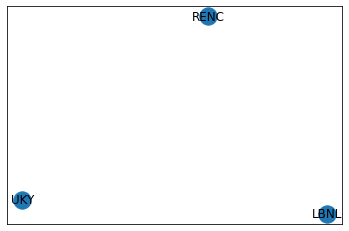

In [7]:
advertised_topology.draw()

## Create Slice

In [9]:
import fim.user as fu
# Create topology
t = fu.ExperimentTopology()

# Add node
n1 = t.add_node(name='n1', site='RENC')

# Set capacities
cap = fu.Capacities()
cap.set_fields(core=4, ram=64, disk=500)

# Set Properties
n1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_ubuntu_20')

# Add PCI devices
n1.add_component(ctype=fu.ComponentType.SmartNIC, model='ConnectX-5', name='nic1')

# Add node
n2 = t.add_node(name='n2', site='RENC')

# Set properties
n2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_ubuntu_20')

# Add PCI devices
n2.add_component(ctype=fu.ComponentType.SmartNIC, model='ConnectX-6', name='nic2')




# # Add node
# n3 = t.add_node(name='n3', site='LBNL')

# # Set properties
# n3.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# # Add PCI devices
# n3.add_component(ctype=fu.ComponentType.GPU, model='Tesla T4', name='nic3')

# Generate Slice Graph
slice_graph = t.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = orchestrator_proxy.create(token=fabric_id_token, slice_name='JupyterSlice3', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
print("Reservations created {}".format(reservations))

Response Status Status.OK
Reservations created [{
    "graph_node_id": "fe716383-8619-4bce-8dc8-9c432a16349a",
    "join_state": "None_",
    "lease_end": "2021-04-18 19:14:31",
    "reservation_id": "42d97ea2-f5b9-494f-945c-2c76064ac2c1",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "8c3ed76c-9a2b-4324-91e7-343288bad42e"
}, {
    "graph_node_id": "8c1fe4d2-1665-4ab2-a81a-7799f065dc3b",
    "join_state": "None_",
    "lease_end": "2021-04-18 19:14:31",
    "reservation_id": "bc66e8c3-ecd3-4f6b-9ad5-83e7afa63975",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "8c3ed76c-9a2b-4324-91e7-343288bad42e"
}]


In [10]:
# Set the Slice ID from output of the above command
slice_id=reservations[0].slice_id

## Query Slices

In [11]:
status, slices = orchestrator_proxy.slices(token=fabric_id_token)

print("Response Status {}".format(status))
print("Slices {}".format(slices))

Response Status Status.OK
Slices [{
    "graph_id": "d57a848a-e80d-431c-a090-70858f53760a",
    "slice_id": "8a8bfacd-2e71-427f-839f-a79ab85515ab",
    "slice_name": "JupyterSlice2",
    "slice_state": "StableOK"
}, {
    "graph_id": "a026d759-3be8-4d92-9707-63f0227e84c1",
    "slice_id": "8c3ed76c-9a2b-4324-91e7-343288bad42e",
    "slice_name": "JupyterSlice3",
    "slice_state": "Configuring"
}]


## Query Slice

In [12]:
status, slice_obj = orchestrator_proxy.get_slice(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Response received {}".format(slice_obj))

Response Status Status.OK
Response received n1[VM]: { core: 4, ram: 64G, disk: 500G, }
n2[VM]: { core: 4, ram: 64G, disk: 500G, }
Links:


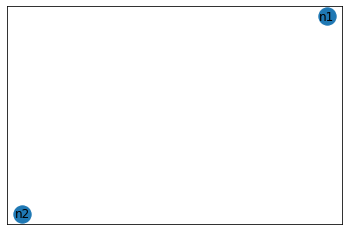

In [13]:
slice_obj.draw()

## Query Slivers

In [19]:
status, reservations = orchestrator_proxy.slivers(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Reservations {}".format(reservations))

Response Status Status.OK
Reservations [{
    "capacities": "{\"core\": 4, \"disk\": 500, \"ram\": 64}",
    "graph_node_id": "8c1fe4d2-1665-4ab2-a81a-7799f065dc3b",
    "join_state": "NoJoin",
    "labels": "",
    "lease_end": "2021-04-18 19:14:31",
    "management_ip": "152.54.15.36",
    "name": "n2",
    "reservation_id": "bc66e8c3-ecd3-4f6b-9ad5-83e7afa63975",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "RENC",
    "slice_id": "8c3ed76c-9a2b-4324-91e7-343288bad42e"
}, {
    "capacities": "{\"core\": 4, \"disk\": 500, \"ram\": 64}",
    "graph_node_id": "fe716383-8619-4bce-8dc8-9c432a16349a",
    "join_state": "NoJoin",
    "labels": "",
    "lease_end": "2021-04-18 19:14:31",
    "management_ip": "152.54.15.54",
    "name": "n1",
    "reservation_id": "42d97ea2-f5b9-494f-945c-2c76064ac2c1",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "RENC",
    "slice_id": "8c3ed76c-9a2b-4324-91e7-343288bad42e"
}]


In [16]:
# Set the Sliver ID from output of the above command by capturing reservation_id
sliver_id=reservations[0].reservation_id

## Query Sliver

In [22]:
status, reservation = orchestrator_proxy.slivers(token=fabric_id_token, slice_id=slice_id, sliver_id=sliver_id)

print("Response Status {}".format(status))
print("Reservation {}".format(reservation))

Response Status Status.OK
Reservation [{
    "capacities": "{\"core\": 4, \"disk\": 500, \"ram\": 64}",
    "graph_node_id": "fe716383-8619-4bce-8dc8-9c432a16349a",
    "join_state": "NoJoin",
    "labels": "",
    "lease_end": "2021-04-18 19:14:31",
    "management_ip": "152.54.15.54",
    "name": "n1",
    "reservation_id": "42d97ea2-f5b9-494f-945c-2c76064ac2c1",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "RENC",
    "slice_id": "8c3ed76c-9a2b-4324-91e7-343288bad42e"
}]


## Slice Status

In [23]:
status, slice_status = orchestrator_proxy.slice_status(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Slice Status {}".format(slice_status))

Response Status Status.OK
Slice Status {
    "graph_id": "a026d759-3be8-4d92-9707-63f0227e84c1",
    "slice_id": "8c3ed76c-9a2b-4324-91e7-343288bad42e",
    "slice_name": "JupyterSlice3",
    "slice_state": "StableOK"
}


## Sliver Status

In [24]:
status, reservation_status = orchestrator_proxy.sliver_status(token=fabric_id_token, slice_id=slice_id, sliver_id=sliver_id)

print("Response Status {}".format(status))
print("Reservation Status {}".format(reservation_status))

Response Status Status.OK
Reservation Status {
    "capacities": "{\"core\": 4, \"disk\": 500, \"ram\": 64}",
    "graph_node_id": "fe716383-8619-4bce-8dc8-9c432a16349a",
    "join_state": "NoJoin",
    "labels": "",
    "lease_end": "2021-04-18 19:14:31",
    "management_ip": "152.54.15.54",
    "name": "n1",
    "notices": "Reservation 42d97ea2-f5b9-494f-945c-2c76064ac2c1 (Slice JupyterSlice3(8c3ed76c-9a2b-4324-91e7-343288bad42e) Graph Id:a026d759-3be8-4d92-9707-63f0227e84c1 ) is in state [Active,None_]\n\nLast ticket update: \nTicket events: \nLast ticket update: \nTicket events: ",
    "reservation_id": "42d97ea2-f5b9-494f-945c-2c76064ac2c1",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "RENC",
    "slice_id": "8c3ed76c-9a2b-4324-91e7-343288bad42e"
}


## Work on the servers start from here

We are going to use paramiko to control our servers through ssh.

In [20]:
import paramiko

We have two servers with two IPs. Let's print them.

In [26]:
reservations[0].management_ip

'152.54.15.36'

In [27]:
reservations[1].management_ip

'152.54.15.54'

Below, we connect to our first server.

In [28]:
key = paramiko.RSAKey.from_private_key_file("/home/fabric/.ssh/id_rsa")
client1 = paramiko.SSHClient()
client1.load_system_host_keys()
client1.set_missing_host_key_policy(paramiko.MissingHostKeyPolicy())

client1.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client1.connect(reservations[0].management_ip,username='ubuntu',pkey = key)

client1

Connection should be established. Let's issue some test commands:

In [29]:
stdin, stdout, stderr = client1.exec_command('lsb_release -a')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.2 LTS
Release:	20.04
Codename:	focal

No LSB modules are available.



In [30]:
stdin, stdout, stderr = client1.exec_command('ip addr')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
    inet6 ::1/128 scope host 
       valid_lft forever preferred_lft forever
2: ens3: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 9000 qdisc fq_codel state UP group default qlen 1000
    link/ether fa:16:3e:dd:6a:e0 brd ff:ff:ff:ff:ff:ff
    inet 10.20.4.228/24 brd 10.20.4.255 scope global dynamic ens3
       valid_lft 86140sec preferred_lft 86140sec
    inet6 fe80::f816:3eff:fedd:6ae0/64 scope link 
       valid_lft forever preferred_lft forever
3: ens7: <BROADCAST,MULTICAST> mtu 1500 qdisc noop state DOWN group default qlen 1000
    link/ether 04:3f:72:b7:15:74 brd ff:ff:ff:ff:ff:ff
4: ens8: <BROADCAST,MULTICAST> mtu 1500 qdisc noop state DOWN group default qlen 1000
    link/ether 04:3f:72:b7:15:75 brd ff:ff:ff:ff:ff:ff




In [31]:
stdin, stdout, stderr = client1.exec_command('curl https://ipinfo.io/ip')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

152.54.15.36
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    12  100    12    0     0    110      0 --:--:-- --:--:-- --:--:--   110



Now we connect to our second server.

In [32]:
key = paramiko.RSAKey.from_private_key_file("/home/fabric/.ssh/id_rsa")
client2 = paramiko.SSHClient()
client2.load_system_host_keys()
client2.set_missing_host_key_policy(paramiko.MissingHostKeyPolicy())

client2.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client2.connect(reservations[1].management_ip,username='ubuntu',pkey = key)

client2

Again, some test commands.

In [33]:
stdin, stdout, stderr = client2.exec_command('curl https://ipinfo.io/ip')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

152.54.15.54
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    12  100    12    0     0    142      0 --:--:-- --:--:-- --:--:--   141



In [34]:
stdin, stdout, stderr = client1.exec_command('curl https://ipinfo.io/ip')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

152.54.15.36
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    12  100    12    0     0    102      0 --:--:-- --:--:-- --:--:--   103



### We have client1 connected to the machine at 152.54.15.44, and client2 connected to the other machine at 152.54.15.51.

In [35]:
client1ip = reservations[0].management_ip
client1ip

'152.54.15.36'

In [36]:
client2ip = reservations[1].management_ip
client2ip

'152.54.15.54'

### Now, let's do a quick ping experiment. Let's let each of the servers ping the other server.

In [37]:
stdin, stdout, stderr = client2.exec_command('ping -c 10 ' + client1ip)
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

PING 152.54.15.36 (152.54.15.36) 56(84) bytes of data.
64 bytes from 152.54.15.36: icmp_seq=1 ttl=63 time=0.941 ms
64 bytes from 152.54.15.36: icmp_seq=2 ttl=63 time=0.323 ms
64 bytes from 152.54.15.36: icmp_seq=3 ttl=63 time=0.360 ms
64 bytes from 152.54.15.36: icmp_seq=4 ttl=63 time=0.344 ms
64 bytes from 152.54.15.36: icmp_seq=5 ttl=63 time=0.313 ms
64 bytes from 152.54.15.36: icmp_seq=6 ttl=63 time=0.409 ms
64 bytes from 152.54.15.36: icmp_seq=7 ttl=63 time=0.383 ms
64 bytes from 152.54.15.36: icmp_seq=8 ttl=63 time=0.463 ms
64 bytes from 152.54.15.36: icmp_seq=9 ttl=63 time=0.319 ms
64 bytes from 152.54.15.36: icmp_seq=10 ttl=63 time=0.334 ms

--- 152.54.15.36 ping statistics ---
10 packets transmitted, 10 received, 0% packet loss, time 9190ms
rtt min/avg/max/mdev = 0.313/0.418/0.941/0.179 ms




In [38]:
stdin, stdout, stderr = client1.exec_command('ping -c 10 ' + client2ip)
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

PING 152.54.15.54 (152.54.15.54) 56(84) bytes of data.
64 bytes from 152.54.15.54: icmp_seq=1 ttl=63 time=0.268 ms
64 bytes from 152.54.15.54: icmp_seq=2 ttl=63 time=0.344 ms
64 bytes from 152.54.15.54: icmp_seq=3 ttl=63 time=0.358 ms
64 bytes from 152.54.15.54: icmp_seq=4 ttl=63 time=0.365 ms
64 bytes from 152.54.15.54: icmp_seq=5 ttl=63 time=0.313 ms
64 bytes from 152.54.15.54: icmp_seq=6 ttl=63 time=0.308 ms
64 bytes from 152.54.15.54: icmp_seq=7 ttl=63 time=0.322 ms
64 bytes from 152.54.15.54: icmp_seq=8 ttl=63 time=0.378 ms
64 bytes from 152.54.15.54: icmp_seq=9 ttl=63 time=0.288 ms
64 bytes from 152.54.15.54: icmp_seq=10 ttl=63 time=0.310 ms

--- 152.54.15.54 ping statistics ---
10 packets transmitted, 10 received, 0% packet loss, time 9200ms
rtt min/avg/max/mdev = 0.268/0.325/0.378/0.033 ms




### Ping experiment complete. Both nodes can see each other.

### Now, let's start a Kubernetes cluster on those two nodes.

We follow the instructions that we have here: https://github.com/apache/openwhisk-deploy-kube/blob/master/docs/k8s-diy-ubuntu.md

Let's let the node connected to client 1 be master. We now simply follow the instructions one by one.

In [39]:
stdin, stdout, stderr = client1.exec_command('sudo apt update')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [109 kB]
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [619 kB]
Get:5 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease [101 kB]
Get:6 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [126 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [7436 B]
Get:9 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [181 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [26.8 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [396 B]
Get:12 http://security.ubuntu.com/ubuntu focal-security/univer

In [40]:
stdin, stdout, stderr = client1.exec_command('sudo apt-get install -y docker.io')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  bridge-utils cgroupfs-mount containerd dns-root-data dnsmasq-base libidn11
  pigz runc ubuntu-fan
Suggested packages:
  ifupdown aufs-tools debootstrap docker-doc rinse zfs-fuse | zfsutils
The following NEW packages will be installed:
  bridge-utils cgroupfs-mount containerd dns-root-data dnsmasq-base docker.io
  libidn11 pigz runc ubuntu-fan
0 upgraded, 10 newly installed, 0 to remove and 36 not upgraded.
Need to get 69.7 MB of archives.
After this operation, 334 MB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 pigz amd64 2.4-1 [57.4 kB]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 bridge-utils amd64 1.6-2ubuntu1 [30.5 kB]
Get:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 cgroupfs-mount all 1.4 [6320 B]
Get:4 http://nova.clouds.archive.ubuntu

In [157]:
stdin, stdout, stderr = client1.exec_command('sudo apt-get update && sudo apt-get install -y apt-transport-https curl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hit:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libcurl4
The following NEW packages will be installed:
  apt-transport-https
The following packages will be upgraded:
  curl libcurl4
2 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 397 kB of archives.
After this operation, 161 kB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/universe amd64 apt-transport-https all 2.0.5 [1704 B]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.5 [161 kB]
Get:3 http://nova.cloud

In [41]:
stdin, stdout, stderr = client1.exec_command('curl -s https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

OK




In [42]:
# shell = client1.invoke_shell()
# shell.send('cat <<EOF | sudo tee /etc/apt/sources.list.d/kubernetes.list\n')
# shell.send('deb https://apt.kubernetes.io/ kubernetes-xenial main\n')
# shell.send('EOF\n')


stdin, stdout, stderr = client1.exec_command('cat <<EOF | sudo tee /etc/apt/sources.list.d/kubernetes.list\ndeb https://apt.kubernetes.io/ kubernetes-xenial main\nEOF\n')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deb https://apt.kubernetes.io/ kubernetes-xenial main




In [43]:
stdin, stdout, stderr = client1.exec_command('cat /etc/apt/sources.list.d/kubernetes.list')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deb https://apt.kubernetes.io/ kubernetes-xenial main




In [44]:
stdin, stdout, stderr = client1.exec_command('sudo apt-get update')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Hit:4 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:5 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease
Get:3 https://packages.cloud.google.com/apt kubernetes-xenial InRelease [9383 B]
Get:6 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 Packages [46.2 kB]
Fetched 55.6 kB in 1s (92.1 kB/s)
Reading package lists...




In [45]:
stdin, stdout, stderr = client1.exec_command('sudo apt-get install -y kubelet kubeadm kubectl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  conntrack cri-tools ebtables kubernetes-cni socat
Suggested packages:
  nftables
The following NEW packages will be installed:
  conntrack cri-tools ebtables kubeadm kubectl kubelet kubernetes-cni socat
0 upgraded, 8 newly installed, 0 to remove and 36 not upgraded.
Need to get 70.5 MB of archives.
After this operation, 309 MB of additional disk space will be used.
Get:6 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 conntrack amd64 1:1.4.5-2 [30.3 kB]
Get:1 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 cri-tools amd64 1.13.0-01 [8775 kB]
Get:7 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 ebtables amd64 2.0.11-3build1 [80.3 kB]
Get:8 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 socat amd64 1.7.3.3-2 [323 kB]
Get:2 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 ku

In [46]:
stdin, stdout, stderr = client1.exec_command('sudo apt-mark hold kubelet kubeadm kubectl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

kubelet set on hold.
kubeadm set on hold.
kubectl set on hold.




In [47]:
stdin, stdout, stderr = client1.exec_command('sudo swapoff -a')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

The setup part is complete. Now, we issue the kubeadm init command. We do it like this:

In [48]:
stdin, stdout, stderr = client1.exec_command('sudo kubeadm init --pod-network-cidr=192.168.0.0/16 --apiserver-advertise-address=0.0.0.0')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

[init] Using Kubernetes version: v1.21.0
[preflight] Running pre-flight checks
[preflight] Pulling images required for setting up a Kubernetes cluster
[preflight] This might take a minute or two, depending on the speed of your internet connection
[preflight] You can also perform this action in beforehand using 'kubeadm config images pull'
[certs] Using certificateDir folder "/etc/kubernetes/pki"
[certs] Generating "ca" certificate and key
[certs] Generating "apiserver" certificate and key
[certs] apiserver serving cert is signed for DNS names [bc66e8c3-ecd3-4f6b-9ad5-83e7afa63975-n2 kubernetes kubernetes.default kubernetes.default.svc kubernetes.default.svc.cluster.local] and IPs [10.96.0.1 10.20.4.228]
[certs] Generating "apiserver-kubelet-client" certificate and key
[certs] Generating "front-proxy-ca" certificate and key
[certs] Generating "front-proxy-client" certificate and key
[certs] Generating "etcd/ca" certificate and key
[certs] Generating "etcd/server" certificate and key
[ce

As stated, the initialization was successful. Now we need to save the join command somewhere, because we will need to use it later in the client.

In [49]:
stdin, stdout, stderr = client1.exec_command('mkdir -p $HOME/.kube')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [50]:
stdin, stdout, stderr = client1.exec_command('sudo cp -i /etc/kubernetes/admin.conf $HOME/.kube/config')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [51]:
stdin, stdout, stderr = client1.exec_command('sudo chown $(id -u):$(id -g) $HOME/.kube/config')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [52]:
stdin, stdout, stderr = client1.exec_command('kubectl apply -f https://docs.projectcalico.org/v3.9/manifests/calico.yaml')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

configmap/calico-config created
customresourcedefinition.apiextensions.k8s.io/felixconfigurations.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/ipamblocks.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/blockaffinities.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/ipamhandles.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/ipamconfigs.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/bgppeers.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/bgpconfigurations.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/ippools.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/hostendpoints.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/clusterinformations.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/globalnetworkpolicies.

In [53]:
stdin, stdout, stderr = client1.exec_command('kubectl get nodes')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAME                                      STATUS     ROLES                  AGE     VERSION
bc66e8c3-ecd3-4f6b-9ad5-83e7afa63975-n2   NotReady   control-plane,master   4m28s   v1.21.0




We need to wait for just a few more seconds for the STATUS to change to Ready.

In [56]:
stdin, stdout, stderr = client1.exec_command('kubectl get nodes')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAME                                      STATUS   ROLES                  AGE     VERSION
bc66e8c3-ecd3-4f6b-9ad5-83e7afa63975-n2   Ready    control-plane,master   4m41s   v1.21.0




It's now ready.

### We are now done with the server. Let's do the client. Remember, we are following the instructions in the link that we have previously mentioned.

In [55]:
stdin, stdout, stderr = client2.exec_command('sudo apt-get update')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [109 kB]
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [619 kB]
Get:5 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease [101 kB]
Get:6 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [126 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [7436 B]
Get:9 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [181 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [26.8 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [396 B]
Get:12 http://security.ubuntu.com/ubuntu focal-security/univer

In [57]:
stdin, stdout, stderr = client2.exec_command('sudo apt-get install -y docker.io')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  bridge-utils cgroupfs-mount containerd dns-root-data dnsmasq-base libidn11
  pigz runc ubuntu-fan
Suggested packages:
  ifupdown aufs-tools debootstrap docker-doc rinse zfs-fuse | zfsutils
The following NEW packages will be installed:
  bridge-utils cgroupfs-mount containerd dns-root-data dnsmasq-base docker.io
  libidn11 pigz runc ubuntu-fan
0 upgraded, 10 newly installed, 0 to remove and 36 not upgraded.
Need to get 69.7 MB of archives.
After this operation, 334 MB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 pigz amd64 2.4-1 [57.4 kB]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 bridge-utils amd64 1.6-2ubuntu1 [30.5 kB]
Get:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 cgroupfs-mount all 1.4 [6320 B]
Get:4 http://nova.clouds.archive.ubuntu

In [58]:
stdin, stdout, stderr = client2.exec_command('sudo apt-get update && sudo apt-get install -y apt-transport-https curl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hit:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libcurl4
The following NEW packages will be installed:
  apt-transport-https
The following packages will be upgraded:
  curl libcurl4
2 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 397 kB of archives.
After this operation, 161 kB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/universe amd64 apt-transport-https all 2.0.5 [1704 B]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.5 [161 kB]
Get:3 http://nova.cloud

In [59]:
stdin, stdout, stderr = client2.exec_command('curl -s https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

OK




In [60]:
stdin, stdout, stderr = client2.exec_command('cat <<EOF | sudo tee /etc/apt/sources.list.d/kubernetes.list\ndeb https://apt.kubernetes.io/ kubernetes-xenial main\nEOF\n')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deb https://apt.kubernetes.io/ kubernetes-xenial main




In [61]:
stdin, stdout, stderr = client2.exec_command('cat /etc/apt/sources.list.d/kubernetes.list')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deb https://apt.kubernetes.io/ kubernetes-xenial main




In [62]:
stdin, stdout, stderr = client2.exec_command('sudo apt-get update')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hit:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:5 http://security.ubuntu.com/ubuntu focal-security InRelease
Get:4 https://packages.cloud.google.com/apt kubernetes-xenial InRelease [9383 B]
Get:6 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 Packages [46.2 kB]
Fetched 55.6 kB in 0s (114 kB/s)
Reading package lists...




In [63]:
stdin, stdout, stderr = client2.exec_command('sudo apt-get install -y kubelet kubeadm kubectl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  conntrack cri-tools ebtables kubernetes-cni socat
Suggested packages:
  nftables
The following NEW packages will be installed:
  conntrack cri-tools ebtables kubeadm kubectl kubelet kubernetes-cni socat
0 upgraded, 8 newly installed, 0 to remove and 34 not upgraded.
Need to get 70.5 MB of archives.
After this operation, 309 MB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 conntrack amd64 1:1.4.5-2 [30.3 kB]
Get:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 ebtables amd64 2.0.11-3build1 [80.3 kB]
Get:4 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 socat amd64 1.7.3.3-2 [323 kB]
Get:2 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 cri-tools amd64 1.13.0-01 [8775 kB]
Get:5 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 ku

In [64]:
stdin, stdout, stderr = client2.exec_command('sudo apt-mark hold kubelet kubeadm kubectl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

kubelet set on hold.
kubeadm set on hold.
kubectl set on hold.




In [65]:
stdin, stdout, stderr = client2.exec_command('sudo swapoff -a')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

### The setup part is complete. Now we need to do the join command. We do it like this:

As a note. When we do "kubeadm init" in the server, it prints the join command for us. What we do is that we copy it and paste it in the client. And don't forget to add sudo.

In [66]:
stdin, stdout, stderr = client2.exec_command('sudo kubeadm join 10.20.4.228:6443 --token 8rtm7z.e26gfxwe669sgngk --discovery-token-ca-cert-hash sha256:19dc666a1c8fb4bce98dbb2019cdaa6e6b5390209e011db124d82cd84e9499b8')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

[preflight] Running pre-flight checks
[preflight] Reading configuration from the cluster...
[preflight] FYI: You can look at this config file with 'kubectl -n kube-system get cm kubeadm-config -o yaml'
[kubelet-start] Writing kubelet configuration to file "/var/lib/kubelet/config.yaml"
[kubelet-start] Writing kubelet environment file with flags to file "/var/lib/kubelet/kubeadm-flags.env"
[kubelet-start] Starting the kubelet
[kubelet-start] Waiting for the kubelet to perform the TLS Bootstrap...

This node has joined the cluster:
* Certificate signing request was sent to apiserver and a response was received.
* The Kubelet was informed of the new secure connection details.

Run 'kubectl get nodes' on the control-plane to see this node join the cluster.


	[WARNING Service-Docker]: docker service is not enabled, please run 'systemctl enable docker.service'
	[WARNING IsDockerSystemdCheck]: detected "cgroupfs" as the Docker cgroup driver. The recommended driver is "systemd". Please follow

Let's check back at the server.

In [67]:
stdin, stdout, stderr = client1.exec_command('kubectl get nodes')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAME                                      STATUS   ROLES                  AGE     VERSION
42d97ea2-f5b9-494f-945c-2c76064ac2c1-n1   Ready    <none>                 3m16s   v1.21.0
bc66e8c3-ecd3-4f6b-9ad5-83e7afa63975-n2   Ready    control-plane,master   9m23s   v1.21.0




### We can see that the worker node is connected. Task complete.

### The next task is to deploy a hello world application.

First, we pull a hello world image and create a "deployment".

In [80]:
stdin, stdout, stderr = client1.exec_command('kubectl create deployment kubernetes-bootcamp --image=gcr.io/google-samples/kubernetes-bootcamp:v1')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deployment.apps/kubernetes-bootcamp created




Now let's do some status commands. They just show us some information.

In [86]:
stdin, stdout, stderr = client1.exec_command('kubectl get pods --all-namespaces')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAMESPACE     NAME                                                              READY   STATUS             RESTARTS   AGE
default       kubernetes-bootcamp-57978f5f5d-4lpvq                              1/1     Running            0          12m
kube-system   calico-kube-controllers-76bf499b46-rrq6x                          1/1     Running            0          9h
kube-system   calico-node-42dxb                                                 0/1     Running            163        9h
kube-system   calico-node-rxdh7                                                 0/1     CrashLoopBackOff   161        9h
kube-system   coredns-558bd4d5db-9ln8d                                          1/1     Running            0          9h
kube-system   coredns-558bd4d5db-h85fm                                          1/1     Running            0          9h
kube-system   etcd-bc66e8c3-ecd3-4f6b-9ad5-83e7afa63975-n2                      1/1     Running            0          9h
kube-system   kube-apiserver-b

In [88]:
stdin, stdout, stderr = client1.exec_command('kubectl describe pod kubernetes-bootcamp-57978f5f5d-4lpvq')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Name:         kubernetes-bootcamp-57978f5f5d-4lpvq
Namespace:    default
Priority:     0
Node:         42d97ea2-f5b9-494f-945c-2c76064ac2c1-n1/10.20.4.206
Start Time:   Sun, 18 Apr 2021 05:04:03 +0000
Labels:       app=kubernetes-bootcamp
              pod-template-hash=57978f5f5d
Annotations:  cni.projectcalico.org/podIP: 192.168.125.2/32
Status:       Running
IP:           192.168.125.2
IPs:
  IP:           192.168.125.2
Controlled By:  ReplicaSet/kubernetes-bootcamp-57978f5f5d
Containers:
  kubernetes-bootcamp:
    Container ID:   docker://d5c9a9b9a3512e5d2236098f47e09b8478702115a64e457f27e2213734e36a58
    Image:          gcr.io/google-samples/kubernetes-bootcamp:v1
    Image ID:       docker-pullable://gcr.io/google-samples/kubernetes-bootcamp@sha256:0d6b8ee63bb57c5f5b6156f446b3bc3b3c143d233037f3a2f00e279c8fcc64af
    Port:           <none>
    Host Port:      <none>
    State:          Running
      Started:      Sun, 18 Apr 2021 05:04:09 +0000
    Ready:          True
    Restar

The next thing we need to do is to create what is called a "service". We are going to use it to expose the deployment to the outside, through a port, which is 8080. Like this:

_Note that the service itself will still need to be exposed. There's another "expose" step that we need to make._

In [101]:
stdin, stdout, stderr = client1.exec_command('kubectl expose deployment/kubernetes-bootcamp --type="ClusterIP" --port 8080')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

service/kubernetes-bootcamp exposed




Let's check that the service was created.

In [102]:
stdin, stdout, stderr = client1.exec_command('kubectl get service kubernetes-bootcamp')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAME                  TYPE        CLUSTER-IP    EXTERNAL-IP   PORT(S)    AGE
kubernetes-bootcamp   ClusterIP   10.103.3.22   <none>        8080/TCP   29s




Finally, we need to run a port forwarding command in order to, as we said, expose the service to the outside.

In [111]:
stdin, stdout, stderr = client1.exec_command('kubectl port-forward --address 0.0.0.0 service/kubernetes-bootcamp 8080:8080 > /dev/null 2>&1 &')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Now our application should finally be visible. Let's test the deployment locally, on the master machine itself.

In [108]:
stdin, stdout, stderr = client1.exec_command('curl localhost:8080')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hello Kubernetes bootcamp! | Running on: kubernetes-bootcamp-57978f5f5d-4lpvq | v=1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    84    0    84    0     0  10500      0 --:--:-- --:--:-- --:--:-- 10500



It does work. Now let's test it remotely. From our notebook.

In [112]:
import requests

x = requests.get('http://152.54.15.36:8080') #, verify=False)
print(x.status_code)
print(x.content)

200
b'Hello Kubernetes bootcamp! | Running on: kubernetes-bootcamp-57978f5f5d-4lpvq | v=1\n'


We have our result. Experiment complete.

## Delete Slice

You can now delete the slice. The code below should do it.

In [ ]:
# status, result = orchestrator_proxy.delete(token=fabric_id_token, slice_id=slice_id)

# print("Response Status {}".format(status))
# print("Response received {}".format(result))